In [1]:
from temds.datasources import worldclim
from temds.datasources import crujra
from temds import downscalers
from temds import corrections
from temds import tile



# from affine import Affine



import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


In [2]:
start_year = 1970
end_year = 2001
c_tile = (7, 16)
tile_index = gpd.read_file('/media/rwspicer/data/V3/tem/00-aoi/tile-index/')
hdx = tile_index['H'] == c_tile[0]
vdx = tile_index['V'] == c_tile[1]
bounds = tile_index[vdx & hdx].bounds
minx, maxx, miny, maxy = bounds[['minx','maxx','miny','maxy']].iloc[0]
minx, maxx, miny, maxy

(-1678000.0, -1402000.0, 2915000.0, 3315000.0)

In [3]:
wc_arctic = worldclim.WorldClim('/media/rwspicer/data/V3/tem/02-arctic/worldclim/worldclim-arctic.nc')

In [4]:
wc_arctic.dataset.rio.crs

CRS.from_wkt('PROJCS["WGS 84 / NSIDC EASE-Grid 2.0 North",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Lambert_Azimuthal_Equal_Area"],PARAMETER["latitude_of_center",90],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",SOUTH],AXIS["Northing",SOUTH],AUTHORITY["EPSG","6931"]]')

In [5]:

annual_list = []
for cru_file in list(Path('/media/rwspicer/data/V3/tem/02-arctic/cru-jra/').glob('*.nc')):
    year = int(cru_file.name.split('.')[-4])
    if year < start_year or year > end_year:
        continue

    temp = crujra.AnnualDaily(year, cru_file, verbose=False, force_aoi_to='tmax', aoi_nodata=np.nan)
    # temp.reproject(tile_index.crs.to_wkt())
    annual_list.append(temp)

annual_list[:5]

[temds.datasources.crujra.AnnualDaily: 1996,
 temds.datasources.crujra.AnnualDaily: 1985,
 temds.datasources.crujra.AnnualDaily: 1998,
 temds.datasources.crujra.AnnualDaily: 1997,
 temds.datasources.crujra.AnnualDaily: 1975]

In [6]:
cru_arctic_ts = crujra.AnnualTimeSeries(annual_list)
cru_arctic_ts[1970:1975]

Checking Continuity (basic)
Data is continuous
Checking Continuity (advanced)
-- Checking 1970
-- Checking 1971
-- Checking 1972
-- Checking 1973
-- Checking 1974
-- Checking 1975
-- Checking 1976
-- Checking 1977
-- Checking 1978
-- Checking 1979
-- Checking 1980
-- Checking 1981
-- Checking 1982
-- Checking 1983
-- Checking 1984
-- Checking 1985
-- Checking 1986
-- Checking 1987
-- Checking 1988
-- Checking 1989
-- Checking 1990
-- Checking 1991
-- Checking 1992
-- Checking 1993
-- Checking 1994
-- Checking 1995
-- Checking 1996
-- Checking 1997
-- Checking 1998
-- Checking 1999
-- Checking 2000
-- Checking 2001
Data is continuous
Checking Continuity (basic)
Data is continuous
Checking Continuity (advanced)
-- Checking 1970
-- Checking 1971
-- Checking 1972
-- Checking 1973
-- Checking 1974
Data is continuous


temds.datasources.crujra.AnnualTimeSeries
-temds.datasources.crujra.AnnualDaily: 1970
-temds.datasources.crujra.AnnualDaily: 1971
-temds.datasources.crujra.AnnualDaily: 1972
-temds.datasources.crujra.AnnualDaily: 1973
-temds.datasources.crujra.AnnualDaily: 1974

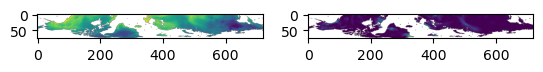

In [7]:
fix, axes = plt.subplots(1,2)
axes[0].imshow(cru_arctic_ts[1970].dataset['tmax'][0])
axes[1].imshow(cru_arctic_ts[1970].dataset['pre'][0])

# plt.imshow(cru_arctic_ts[1970].dataset['pre'][0])
# plt.colorbar()

In [8]:
mytile = tile.Tile(c_tile, bounds, 4000, tile_index.crs.to_wkt(), buffer_px=20)

In [9]:
mytile.import_normalized('worldclim', wc_arctic, flip_y = True)

mytile.data['worldclim'] 
del(wc_arctic)

ll


<xarray.Dataset> Size: 5MB
Dimensions:      (y: 140, x: 109, time: 12)
Coordinates:
  * y            (y) float64 1kB 3.393e+06 3.389e+06 ... 2.841e+06 2.837e+06
  * x            (x) float64 872B -1.756e+06 -1.752e+06 ... -1.324e+06
  * time         (time) int64 96B 1 32 60 91 121 152 182 213 244 274 305 335
    spatial_ref  int64 8B 0
Data variables:
    tmin         (time, y, x) float32 732kB nan nan nan ... -18.87 -18.42 -18.54
    tmax         (time, y, x) float32 732kB nan nan nan ... -9.662 -9.476 -9.704
    tavg         (time, y, x) float32 732kB nan nan nan ... -14.28 -13.95 -14.13
    prec         (time, y, x) float32 732kB nan nan nan ... 27.16 27.62 27.98
    srad         (time, y, x) float32 732kB nan nan nan ... 465.8 458.0 454.9
    wind         (time, y, x) float32 732kB nan nan nan ... 2.561 2.569 2.532
    vapr         (time, y, x) float32 732kB nan nan nan ... 0.1626 0.1543 0.1539

Text(0.5, 1.0, 'wc example')

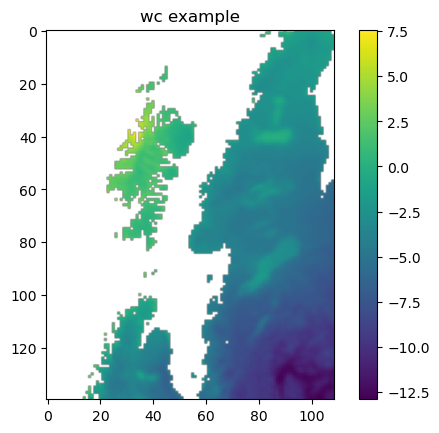

In [10]:
fig, axes= plt.subplots (1,1, dpi=100)

im = axes.imshow(mytile.data['worldclim']['tmax'].data[0])
fig.colorbar(im, ax=axes)
axes.set_title('wc example')


In [11]:
mytile.import_normalized('cru_AnnualTimeSeries', cru_arctic_ts)
del(cru_arctic_ts)

temds.datasources.crujra.AnnualDaily: 1970 clipping
temds.datasources.crujra.AnnualDaily: 1971 clipping
temds.datasources.crujra.AnnualDaily: 1972 clipping
temds.datasources.crujra.AnnualDaily: 1973 clipping
temds.datasources.crujra.AnnualDaily: 1974 clipping
temds.datasources.crujra.AnnualDaily: 1975 clipping
temds.datasources.crujra.AnnualDaily: 1976 clipping
temds.datasources.crujra.AnnualDaily: 1977 clipping
temds.datasources.crujra.AnnualDaily: 1978 clipping
temds.datasources.crujra.AnnualDaily: 1979 clipping
temds.datasources.crujra.AnnualDaily: 1980 clipping
temds.datasources.crujra.AnnualDaily: 1981 clipping
temds.datasources.crujra.AnnualDaily: 1982 clipping
temds.datasources.crujra.AnnualDaily: 1983 clipping
temds.datasources.crujra.AnnualDaily: 1984 clipping
temds.datasources.crujra.AnnualDaily: 1985 clipping
temds.datasources.crujra.AnnualDaily: 1986 clipping
temds.datasources.crujra.AnnualDaily: 1987 clipping
temds.datasources.crujra.AnnualDaily: 1988 clipping
temds.dataso

In [12]:
mytile.data['cru_AnnualTimeSeries']

for year in range(start_year,end_year+1):
    mytile.data['cru_AnnualTimeSeries'][year].dataset['x'] = mytile.data['worldclim'].x
    mytile.data['cru_AnnualTimeSeries'][year].dataset['y'] = mytile.data['worldclim'].y





In [13]:
mytile.calculate_climate_baseline(1970, 1975, 'cru_baseline', 'cru_AnnualTimeSeries')
mytile.data['cru_baseline']




creating baseline for tmin with mean
creating baseline for tmax with mean
creating baseline for tmp with mean
creating baseline for pre with sum
creating baseline for dswrf with sum
creating baseline for ugrd with mean
creating baseline for vgrd with mean
creating baseline for spfh with mean
creating baseline for pres with mean


<xarray.Dataset> Size: 7MB
Dimensions:      (time: 12, y: 140, x: 109)
Coordinates:
  * x            (x) float64 872B -1.756e+06 -1.752e+06 ... -1.324e+06
  * y            (y) float64 1kB 3.393e+06 3.389e+06 ... 2.841e+06 2.837e+06
  * time         (time) int64 96B 1 32 60 91 121 152 182 213 244 274 305 335
    spatial_ref  int64 8B 0
Data variables:
    tmin         (time, y, x) float32 732kB nan nan nan ... 255.5 255.4 255.3
    tmax         (time, y, x) float32 732kB nan nan nan ... 261.2 261.2 261.1
    tmp          (time, y, x) float32 732kB nan nan nan ... 255.8 255.7 255.6
    pre          (time, y, x) float32 732kB nan nan nan ... 29.47 29.51 29.52
    dswrf        (time, y, x) float32 732kB nan nan nan ... 2.163e+07 2.154e+07
    ugrd         (time, y, x) float32 732kB nan nan nan ... -0.2943 -0.2177
    vgrd         (time, y, x) float32 732kB nan nan nan ... -0.248 -0.3089
    spfh         (time, y, x) float32 732kB nan nan nan ... 0.0006335 0.0006285
    pres         (time, y, x) float32 732kB nan nan nan ... 9.468e+04 9.503e+04

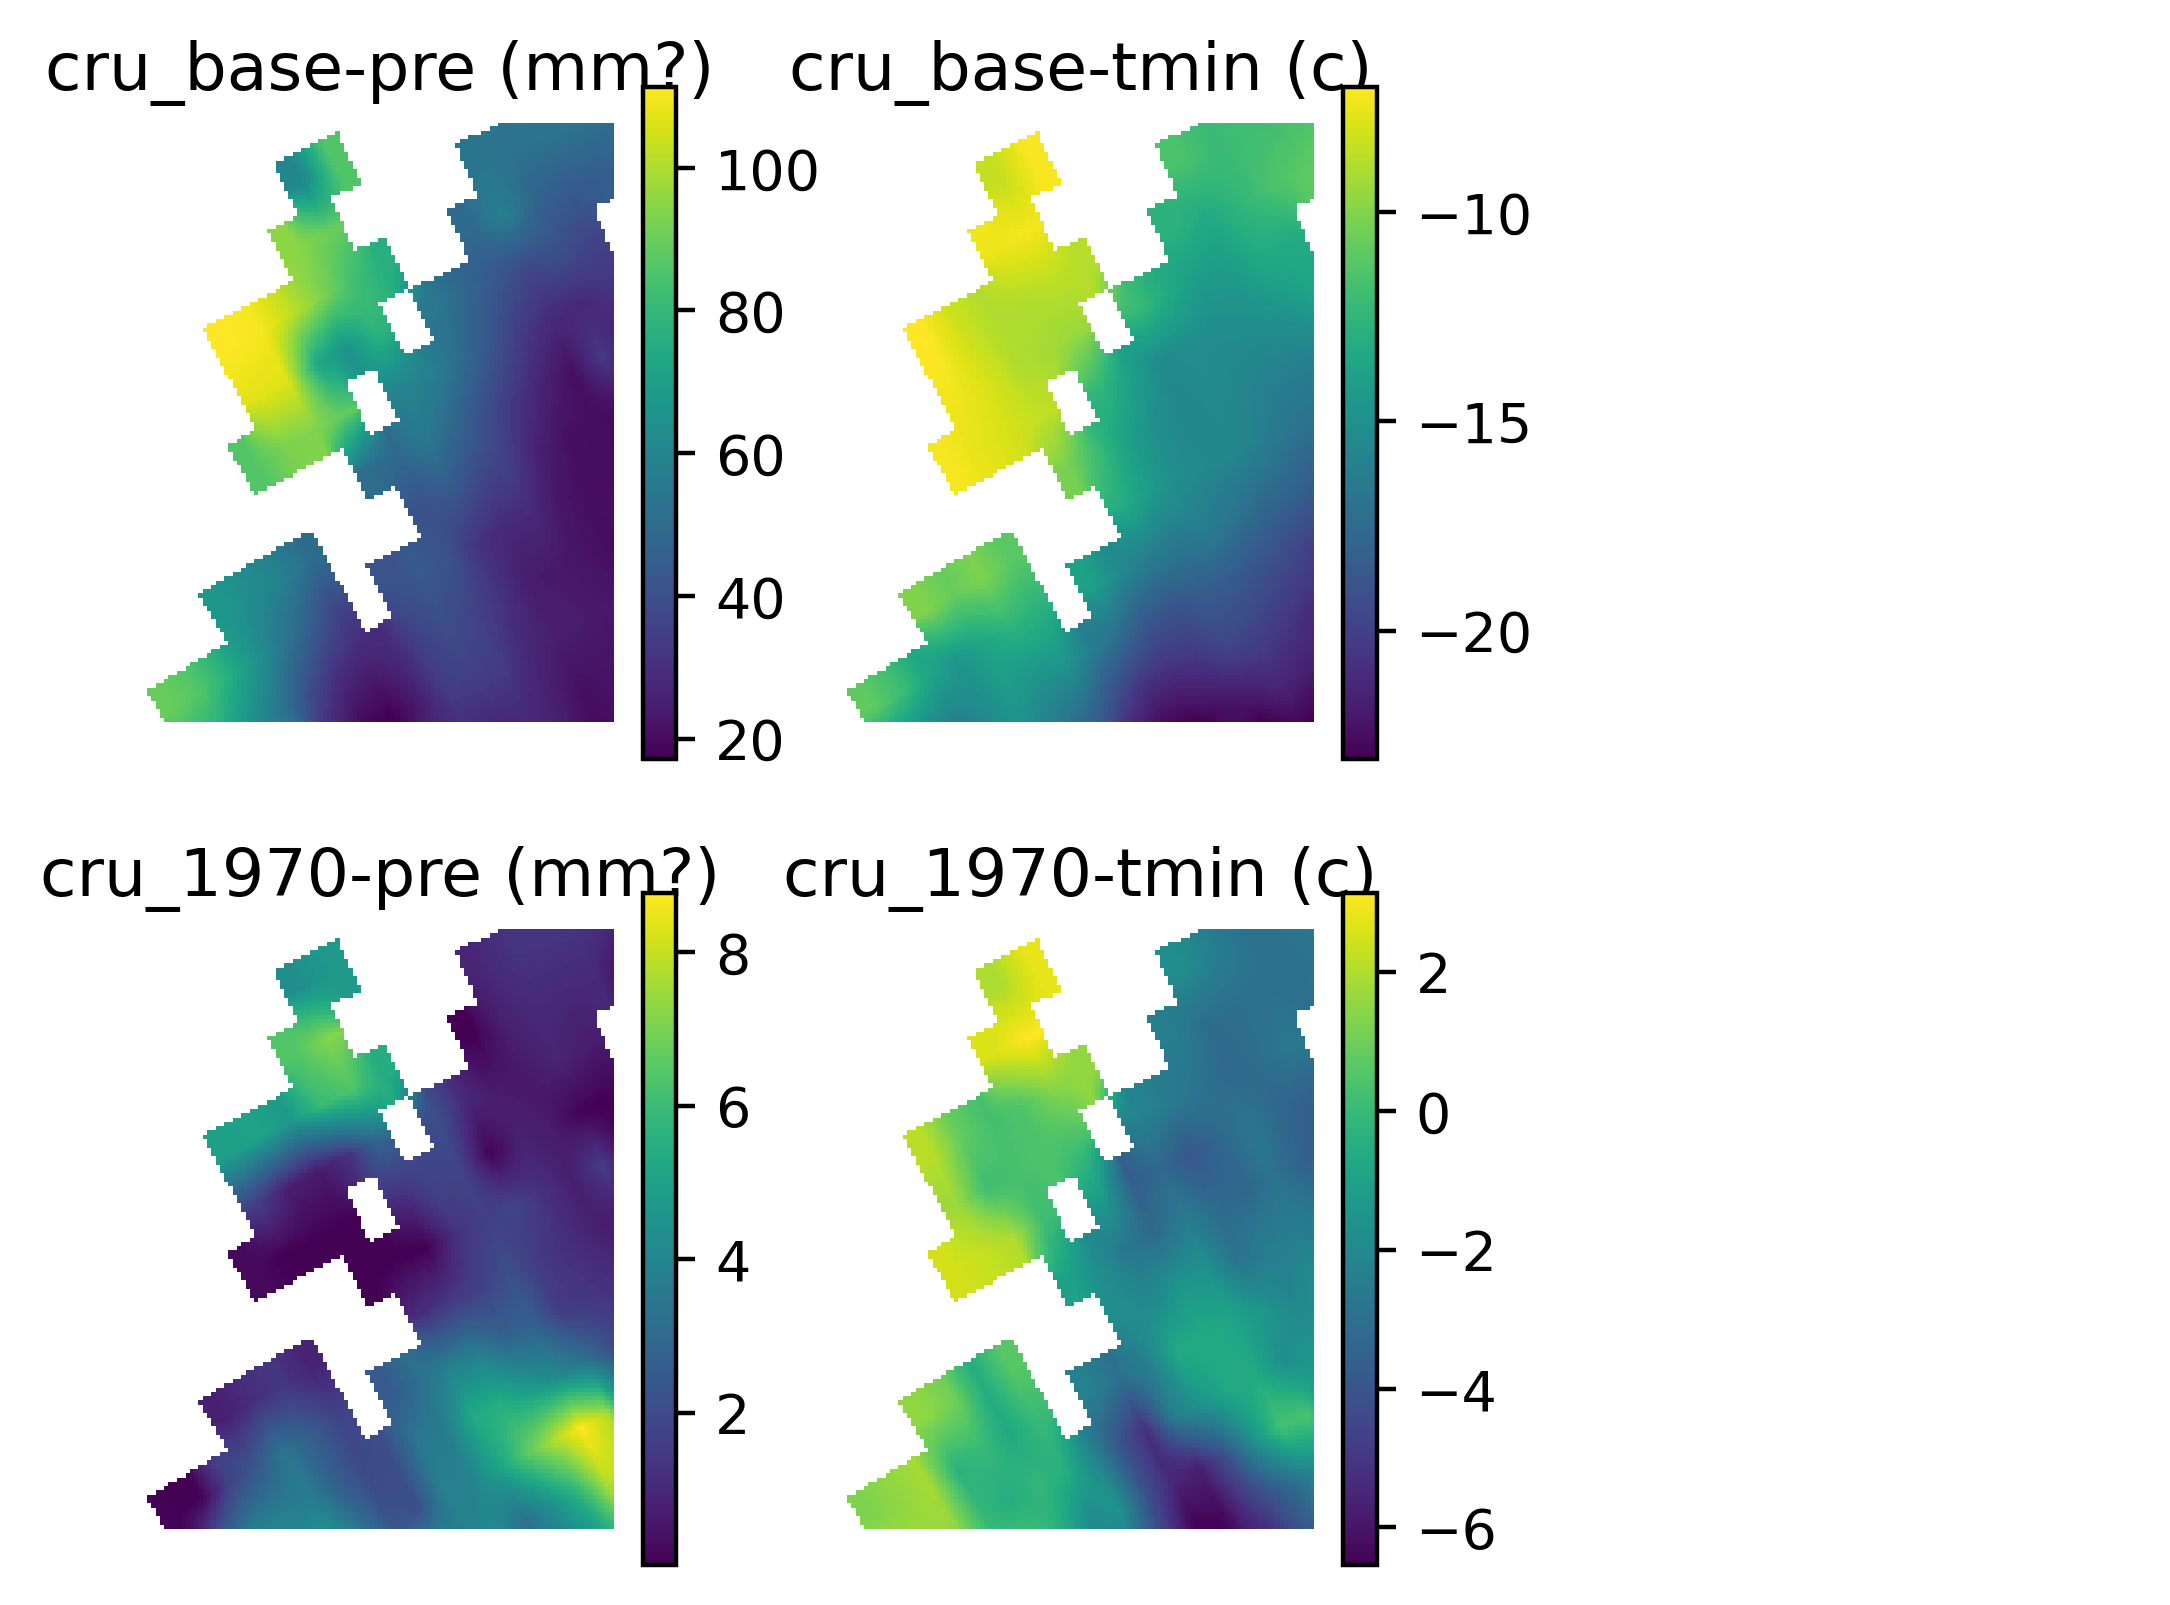

In [14]:
# img = mytile.data['cru_AnnualTimeSeries'][1970].dataset['tmax'].data[0]
# img = mytile.data['cru_baseline']['pre'].data[0]
# # img = mytile.data['worldclim']['tmax'].data[0]

# plt.imshow(img)
# plt.colorbar()
fig, axes= plt.subplots (2,3, dpi=400)

im = axes[0][0].imshow(mytile.data['cru_baseline']['pre'].data[0])
fig.colorbar(im, ax=axes[0][0])
axes[0][0].set_title('cru_base-pre (mm?)')

im = axes[0][1].imshow(mytile.data['cru_baseline']['tmin'].data[0] - downscalers.ZERO_C_IN_K)
fig.colorbar(im, ax=axes[0][1])
axes[0][1].set_title('cru_base-tmin (c)')

im = axes[1][0].imshow(mytile.data['cru_AnnualTimeSeries'][1970].dataset['pre'].data[0])
fig.colorbar(im, ax=axes[1][0])
axes[1][0].set_title('cru_1970-pre (mm?)')

im = axes[1][1].imshow(mytile.data['cru_AnnualTimeSeries'][1970].dataset['tmax'].data[0] - downscalers.ZERO_C_IN_K)
fig.colorbar(im, ax=axes[1][1])
axes[1][1].set_title('cru_1970-tmin (c)')


for xx in range(2):
    for yy in range(3):
        axes[xx][yy].axis('off')

plt.show()

In [15]:

# mytile.toggle_verbose()
# mytile.save('/media/rwspicer/data/V3/tem/03-tiles-testing', overwrite=True, clear_existing=True)
# mytile.toggle_verbose()